In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from scipy.stats import gaussian_kde

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

tr1 = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

In [3]:
bd1, tr1

(array([ 3107,  6214,  9321, 12428, 15535, 18642, 21749, 24856, 27963,
        31070, 34177, 37284, 40391, 43498, 46605, 49712, 52819, 55926,
        59033, 62140, 65247, 68354, 71461, 74568, 77675, 80782, 83889,
        86996, 90103, 93210, 96317]),
 array([0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.0011    , 0.0011    , 0.0011    , 0.0011    ,
        0.0011    , 0.00110032, 0.00468813, 0.01035733, 0.00148488,
        0.00365075, 0.00393651, 0.0032368 , 0.00323998, 0.00316904,
        0.00252679, 0.00226022, 0.00214878, 0.00202083, 0.00190445,
        0.00178522]))

In [26]:
# Remove ambient light
filters = []
for val in tr1:
    if val == stats.mode(tr1):
        filters.append(False)
    else:
        filters.append(True)
tr1 = tr1[filters]
bd1 = bd1[filters]

array([0.00115219, 0.00119422, 0.00119422, 0.00119422, 0.00119422,
       0.00119422, 0.00119422, 0.00119422, 0.00119422, 0.00119422,
       0.00119422, 0.00119422, 0.00119422, 0.00119422, 0.00119422,
       0.00119424, 0.00133168, 0.00516923, 0.0106888 , 0.0020339 ,
       0.00389163, 0.00423604, 0.00354092, 0.00351467, 0.00341866,
       0.00275759, 0.00245975, 0.00233221, 0.00219437, 0.00206747,
       0.00187447])

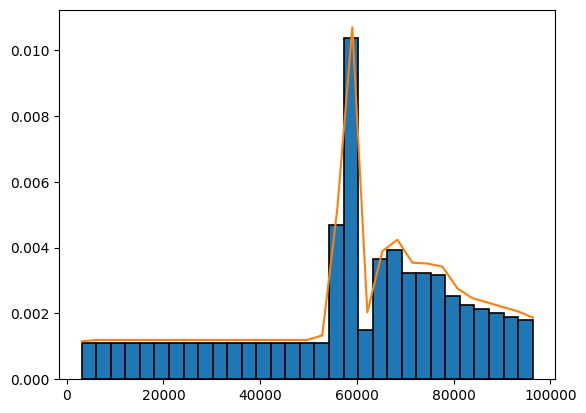

In [9]:
kde = gaussian_kde(bd1, bw_method=0.05, weights=tr1)
plt.hist(bd1, bins=len(bd1), weights=tr1, edgecolor='black', linewidth=1.2)
plt.plot(bd1, kde(bd1)*200)
kde.evaluate(bd1)*200